# Biostat M280 Homework 1
## Sarah Ji
#### Due Apr 27 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

0. Apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

0. Create a **private** repository `biostat-m280-2018-spring` and add `Hua-Zhou` and `LuZhangstat` (TA) as your collaborators.

0. Top directories of the repository should be `hw1`, `hw2`, ... Create two branches `master` and `develop`. The `develop` branch will be your main playground, the place where you develop solution (code) to homework problems and write up report. The `master` branch will be your presentation area. Put your homework submission files (IJulia notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in `master` branch.  

0. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

0. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming by John Myles White. Following rules in the style guide will be strictly enforced when grading: (4), (6), (7), (8), (9), (12), (13) and (16).

# Solution:

1. Yes I have, and my Git-hub name is: sarah-ji

2. Yes I have created a private repository and added `Hua-Zhou` and `LuZhangstat` as collaborators.

3. Yes I have created two branches, one called master and one called develop. 

4. Yes I have tagged homework 1 as `hw1`.

5. Yes I have read the style guide for Julia programming.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules.  
0. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

0. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

0. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

0. Is `0 * x == 0` true for all floating-point number `x`?  

0. Is `x / a == x * (1 / a)` always true?

# just one counter example

## Q2.1 Solution:

We see that in Julia the association rule does not check out.

In [31]:
x = 0.1;
y = 0.1;
z = 1.0;

(x + y) + z == x + (y + z)

false

Next, we explore using the @show function to see exactly what the right and left hand side values are.

In [34]:
@show (x + y) + z
@show x + (y + z)

(x + y) + z = 1.2
x + (y + z) = 1.2000000000000002


1.2000000000000002

## Explanation: 
We see from above that the left hand side equals 1.2 and the right hand side equals 1.2000000000000002. This can be explained because of the way Julia is handling the rounding of the numbers. From Hua Zhou's notes on <http://hua-zhou.github.io/teaching/biostatm280-2018spring/slides/04-arith/arith.html>:

>Rounding is necessary whenever a number has more than p significand bits. Most computer systems use the default IEEE 754 round to nearest mode (also called ties to even mode). Julia offers several rounding modes, the default being RoundNearest. For example, the number 0.1 in decimal system cannot be represented accurately as a floating point number

As x = 0.1 and y = 0.1 and the number 0.1 in the decimal system cannot be represented accurately as a floating point number, we get a marginal difference of .0000000000000002.

Similarly, for the same reason, we see a discrepancy in the questions below.

## Q2.2 Solution:

We see that in Julia, some floating-point numbers obey the associative rule for multiplication but some do not.

In [71]:
x1 = 0.7
x2 = 0.2
y1 = 0.8
z = 3.3

println((x1 * y1) * z == x1 * (y1 * z))
println((x2 * y1) * z == x2 * (y1 * z))

false
true


In [72]:
@show (x1 * y1) * z
@show x1 * (y1 * z)

@show (x2 * y1) * z
@show x2 * (y1 * z)

(x1 * y1) * z = 1.8479999999999996
x1 * (y1 * z) = 1.8479999999999999
(x2 * y1) * z = 0.528
x2 * (y1 * z) = 0.528


0.528

## Q2.3 Solution:

We see that in Julia, some floating-point numbers obey the distributive rule but some do not.

In [79]:
x3 = 0.7
x4 = 0.2
y2 = 0.8
a = 0.1

println(a * (x3 + y2) == a * x3 + a * y2)
println(a * (x4 + y2) == a * x4 + a * y2)

true
false


In [78]:
@show a * (x3 + y2)
@show a * x3 + a * y2

@show a * (x4 + y2)
@show a * x4 + a * y2

a * (x3 + y2) = 0.15000000000000002
a * x3 + a * y2 = 0.15000000000000002
a * (x4 + y2) = 0.1
a * x4 + a * y2 = 0.10000000000000002


0.10000000000000002

## Q2.4 Solution:

We see that in Julia the floating-point numbers do obey the distributive rule for multiplication.

In [28]:
println(0 * x1 == 0)
println(0 * Inf == 0)

true
false


In [81]:
@show 0 * x1
@show 0 * Inf

0x1 = 0.0
0Inf = NaN


NaN

## Q2.5 Solution:

We see that in Julia, `0 * x == 0` is not true for all floating-point number `x`.

In [84]:
println(x1 / a == x1 * (1 / a))
println(x2 / a == x2 * (1 / a))

false
true


In [85]:
@show x1 / a
@show x1 * (1 / a)
@show x2 / a
@show x2 * (1 / a)

x1 / a = 6.999999999999999
x1 * (1 / a) = 7.0
x2 / a = 2.0
x2 * (1 / a) = 2.0


2.0

## Q3

Consider Julia function
```julia
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end
```
0. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
2. Compare the bitcode from questions 1 and 2. What do you find?  
3. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
```
Explain what does macro `@fastmath` do?

## Q3.1 Solution:


In [108]:
typeof(Inf)

Float64

In [8]:
function g(k)
    for i = 1:10
        k = 5k - 1
    end
    k
end

code_llvm(g, (Int64, ))


define i64 @julia_g_63026(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


We see that for the function g(k), if k is an input of type Int64 then the bitcode indicates a total of 2 flops.

## Q3.2 Solution:

code_llvm(g, (Float64, ))

We see that for the function g(k), if k is an input of type Float64 then the bitcode indicates a total of 20 flops.

## Q3.3 Solution:

We see that for the function g(k), integers (Int64) obeys the associative rule for multiplication and the distributive property, but Float64 numbers do not. 

## Q3.4 Solution:

In [9]:
function g_fastmath(k)
    @fastmath for i = 1:10  
        k = 5k - 1
    end
    k
end
code_llvm(g_fastmath, (Int64, ))


define i64 @julia_g_fastmath_63039(i64) #0 !dbg !5 {
top:
  %1 = mul i64 %0, 9765625
  %2 = add i64 %1, -2441406
  ret i64 %2
}


In [10]:
code_llvm(g_fastmath, (Float64, ))


define double @julia_g_fastmath_63040(double) #0 !dbg !5 {
top:
  %1 = fmul fast double %0, 9.765625e+06
  %2 = fadd fast double %1, -2.441406e+06
  ret double %2
}


We see that for the function g_fastmath(k), the bitcode indicates a total of 2 flops for either input type Float64 or Int64. 

The macro @fastmath allows the function g_fastmath(k), regardless of input type (Float64 or Int64), to obey the associative rule for multiplication and the distributive property.

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.  
0. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x -1` at points `x`.  

1. Plot the polynomial `y = (x - 1)^7` at points `x`.  

2. Explain what you found.

## Q4.1 Solution

In [113]:
x = Vector(0.988:0.001:1.012)

25-element Array{Float64,1}:
 0.988
 0.989
 0.99 
 0.991
 0.992
 0.993
 0.994
 0.995
 0.996
 0.997
 0.998
 0.999
 1.0  
 1.001
 1.002
 1.003
 1.004
 1.005
 1.006
 1.007
 1.008
 1.009
 1.01 
 1.011
 1.012

In [127]:
using Plots
pyplot()
y = zeros(length(x));
for i in 1:length(x)
y[i] = x[i]^7 - 7x[i]^6 + 21x[i]^5 - 35x[i]^4 + 35x[i]^3 - 21x[i]^2 + 7x[i] - 1
end

y

25-element Array{Float64,1}:
 -3.55271e-14
 -2.30926e-14
 -1.42109e-14
 -7.99361e-15
 -6.21725e-15
 -4.44089e-15
 -1.77636e-15
 -3.55271e-15
 -1.77636e-15
 -2.66454e-15
 -8.88178e-16
 -1.77636e-15
  0.0        
 -5.32907e-15
 -6.21725e-15
  1.77636e-15
 -1.77636e-15
 -8.88178e-16
 -1.77636e-15
  0.0        
  2.66454e-15
 -3.55271e-15
  7.10543e-15
  1.86517e-14
  4.61853e-14


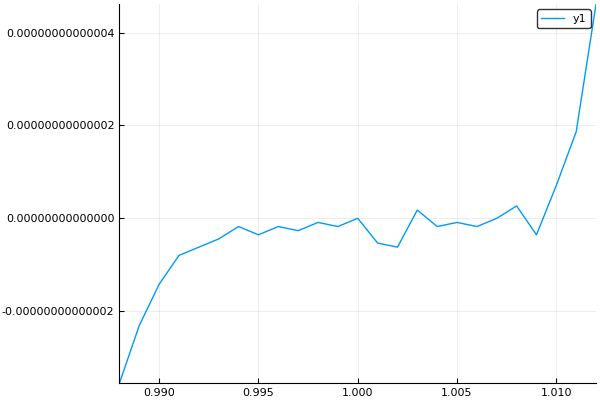

In [128]:
plot(x, y)

## Q4.2 Solution

In [130]:
y2 = zeros(length(x));
for i in 1:length(x)
y2[i] = (x[i] - 1)^7
end

y2

25-element Array{Float64,1}:
 -3.58318e-14
 -1.94872e-14
 -1.0e-14    
 -4.78297e-15
 -2.09715e-15
 -8.23543e-16
 -2.79936e-16
 -7.8125e-17 
 -1.6384e-17 
 -2.187e-18  
 -1.28e-19   
 -1.0e-21    
  0.0        
  1.0e-21    
  1.28e-19   
  2.187e-18  
  1.6384e-17 
  7.8125e-17 
  2.79936e-16
  8.23543e-16
  2.09715e-15
  4.78297e-15
  1.0e-14    
  1.94872e-14
  3.58318e-14


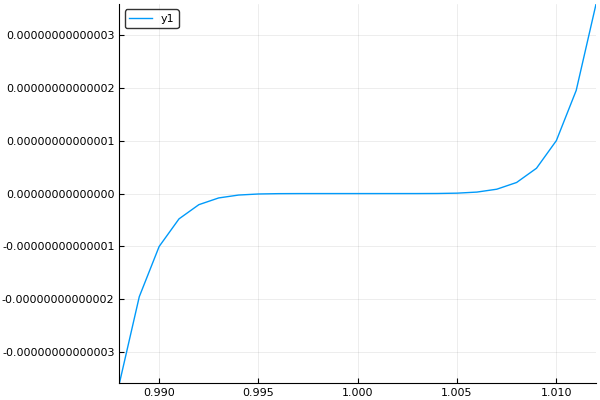

In [131]:
plot(x, y2)

## Q4.3 Solution

 We see that the first and second equations in questions 1 and 2 are equivalent, but that the multiplied out formula in question 1 performs many more subtraction operations between polynomial terms. 
 
Since the equation in question 2 only has one subtraction operation, we note that there will be more precision in the second formula vs. in the first formula due to catastrophic cancellation.

## Q5

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  
0. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 3 ways, e.g., looping, [comprehension](https://docs.julialang.org/en/stable/manual/arrays/#Comprehensions-1), and vectorization. Compute and print `H` for `n = 5`.   
0. Compare their efficiencies at `n = 1000`.
0. Try different rounding modes (use function `setrounding(Float64, RoundingMode)`) and report the entry `inv(H)[1, 1]` for `n = 15`.

## Q5.1 Solution:

In [1]:
#looping 
function h(n)
    H = zeros(n, n)
        for j in 1:n
            for i in 1:n
            H[i, j] = 1 / (i + j - 1)
        end
    end
    H
end

h (generic function with 1 method)

In [10]:
n = 5;
h(n)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [6]:
#comprehension
function h2(n)
    H = [1 / (i + j - 1) for i in 1:n, j in 1:n]
end

h2 (generic function with 1 method)

In [7]:
h2(n)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

In [8]:
#vectorization
function h3(n)
    H = 1 ./ (repmat((1:n)', n, 1) + repmat((1:n), 1, n) - 1)
end

h3 (generic function with 1 method)

In [9]:
h3(n)

5×5 Array{Float64,2}:
 1.0       0.5       0.333333  0.25      0.2     
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125   
 0.2       0.166667  0.142857  0.125     0.111111

## Q5.2 Solution:

In [12]:
using BenchmarkTools
n = 1000;
@benchmark h(n)

INFO: Precompiling module BenchmarkTools.


BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     2.234 ms (0.00% GC)
  median time:      2.781 ms (0.00% GC)
  mean time:        3.251 ms (18.23% GC)
  maximum time:     57.180 ms (95.21% GC)
  --------------
  samples:          1531
  evals/sample:     1

In [13]:
@benchmark h2(n)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  2
  --------------
  minimum time:     2.871 ms (0.00% GC)
  median time:      3.540 ms (0.00% GC)
  mean time:        3.992 ms (14.11% GC)
  maximum time:     66.707 ms (93.22% GC)
  --------------
  samples:          1250
  evals/sample:     1

In [14]:
@benchmark h3(n)

BenchmarkTools.Trial: 
  memory estimate:  38.33 MiB
  allocs estimate:  6037
  --------------
  minimum time:     11.568 ms (3.53% GC)
  median time:      13.839 ms (20.10% GC)
  mean time:        14.296 ms (22.00% GC)
  maximum time:     86.036 ms (85.77% GC)
  --------------
  samples:          350
  evals/sample:     1

We made note that as Julia reads in data column major, to create the matrix via looping, we should make the inner loop index to be `i` and the outer loop indexed `j` to increase efficiency.

From the benchmarking, we see looping and comprehension takes about 3-4 seconds on average, while vectorization takes about 14 seconds on average. This indicates that while the code ultimately creates the same matrix, the method of creation affects the efficiency. Looping and comprehension methods of creation are much more efficient than vectorization creation methods.

## Q6

0. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

0. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

0. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

0. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

## Q6.1 Solution:

>First we get the Identity matrix on the left hand side by multiplying both sides by: $$ (\mathbf{A} + \mathbf{u}\mathbf{u}^T) $$ to get:

$$\mathbf{I} = (\mathbf{A} + \mathbf{u} \mathbf{u}^T) * (\mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}) $$
<br>


> Then we multiply out the right hand side to get this:
$$\mathbf{A}\mathbf{A}^{-1} + \mathbf{uv}^{T}\mathbf{A}^{-1} - 
\frac{(\mathbf{A}\mathbf{A}^{-1}\mathbf{uv}^{T}\mathbf{A}^{-1}+\mathbf{uv}^{T}\mathbf{A}^{-1}\mathbf{uv}^{T}\mathbf{A}^{-1})} {(1 + \mathbf{u}^{T}\mathbf{A}^{-1}\mathbf{u})}$$

<br>
>We simplify what multiplies to be the Identity matrix, and what multiplies the Identiy Matrix on the right hand side

$$\mathbf{I} + \mathbf{uu}^{T}\mathbf{A}^{-1} - \frac{\mathbf{uu}^{T}\mathbf{A}^{-1} + \mathbf{uu}^{T}\mathbf{A}^{-1}\mathbf{uu}^{T}\mathbf{A}^{-1}}{1 + \mathbf{u}^{T}\mathbf{A}^{-1}\mathbf{u} } 
$$

<br>
>We can start to factor out the numerator by first pulling out the $\mathbf{u}$ term to get:

$$\mathbf{I} + \mathbf{uu}^{T}\mathbf{A}^{-1} - \frac{\mathbf{u}*(\mathbf{u}^{T}\mathbf{A}^{-1} + \mathbf{u}^{T}\mathbf{A}^{-1}\mathbf{uu}^{T}\mathbf{A}^{-1})}{1 + \mathbf{u}^{T}\mathbf{A}^{-1}\mathbf{u} } 
$$

<br>
>Next we factor out in the numerator the term: $$(\mathbf{u}^{T}\mathbf{A}^{-1})$$ to get on the right hand side:
$$\mathbf{I} + \mathbf{uu}^{T}\mathbf{A}^{-1} - \frac{\mathbf{u }(1 + \mathbf{u}^{T}\mathbf{A}^{-1}\mathbf{u)}(\mathbf{u}^{T}\mathbf{A}^{-1})}{1 + \mathbf{u}^{T}\mathbf{A}^{-1}\mathbf{u}}$$
<br>

>Next we cancel the common term: $$({1 + \mathbf{u}^{T}\mathbf{A}^{-1}\mathbf{u}})$$ from the numerator and the denominator of the fraction to get on the right hand side:

$$\mathbf{I} + \mathbf{uu}^{T}\mathbf{A}^{-1} - \mathbf{u}(\mathbf{u}^{T}\mathbf{A}^{-1})$$

>Now if we multiply out the second term we get: 
<br>
$$\mathbf{I} + \mathbf{uu}^{T}\mathbf{A}^{-1} - \mathbf{uu}^{T}\mathbf{A}^{-1}$$
<br>

>Simplifying, we get that the right hand side equals the Identity Matrix, same as the left hand side.
$$\mathbf{I}=\mathbf{I}$$ 

## Q6.2 Solution:

>First we get the Identity matrix on the left hand side by multiplying both sides by: $$(\mathbf{A} + \mathbf{U} \mathbf{V}^T)$$ to get:

$$\mathbf{I} = (\mathbf{A} + \mathbf{U} \mathbf{V}^T)(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1})$$<br>

>Next we multiply out the right hand side to get:

$$\mathbf{I} = \mathbf{I} + \mathbf{UV^TA^{-1} - \mathbf{U(I + V^TA^{-1}U)^{-1}V^TA^{-1}}  - \mathbf{UV^TA^{-1}U(I + V^TA^{-1}U)^{-1}V^{T}A^{-1}}}$$
<br>

> We then factor out the $\mathbf{U}$ on right hand side to get:

<br>
$$\mathbf{I} = \mathbf{I} + \mathbf{U(V^TA^{-1} - \mathbf{(I + V^TA^{-1}U)^{-1}V^TA^{-1}}  - \mathbf{V^TA^{-1}U(I + V^TA^{-1}U)^{-1}V^{T}A^{-1}}})$$

> Next we factor out the $\mathbf{V^TA^{-1}}$ term on the second term of the right hand side to get:

<br>
$$\mathbf{I} = \mathbf{I} + \mathbf{U(\mathbf{V^TA^{-1}})(I - \mathbf{(I + V^TA^{-1}U)^{-1}}  - \mathbf{V^TA^{-1}U(I + V^TA^{-1}U)^{-1}}}))$$
<br>

> We start to simplify by writing out the identity matrix in the second term of the right hand side as a product of: $\mathbf{(I + V^TA^{-1}U)^{-1}}\mathbf{(I + V^TA^{-1}U)}$ to get:
<br>

$$\mathbf{I} = \mathbf{I} + \mathbf{U(\mathbf{V^TA^{-1}})(\mathbf{(I + V^TA^{-1}U)^{-1}}\mathbf{(I + V^TA^{-1}U)} - \mathbf{(I + V^TA^{-1}U)^{-1}}  - \mathbf{V^TA^{-1}U(I + V^TA^{-1}U)^{-1}}}))$$
<br>

> We can now factor out the common term: $\mathbf{(I + V^TA^{-1}U)^{-1}}$ from the right hand side to get:
<br>

$$\mathbf{I} = \mathbf{I} + \mathbf{U(\mathbf{V^TA^{-1}})(I + V^TA^{-1}U)^{-1}\mathbf{((I + V^TA^{-1}U}) - \mathbf{I}  - \mathbf{V^TA^{-1}U}}))$$

> Simplifying we get the right hand side, we get: 

$$\mathbf{I} = \mathbf{I} + \mathbf{U(\mathbf{V^TA^{-1}})(I + V^TA^{-1}U)^{-1}\mathbf{(I + V^TA^{-1}U} - \mathbf{I}  - \mathbf{V^TA^{-1}U}})$$
<br>

>Notice the term $\mathbf{(I + V^TA^{-1}U} - \mathbf{I}  - \mathbf{V^TA^{-1}U})$ = 0 so we get:

$$\mathbf{I} = \mathbf{I} + \mathbf{U((I + V^TA^{-1}U)^{-1} * 0}))  \mathbf{V^TA^{-1}}$$
<br>

>Simplifying we get that the second term on the right hand side goes to 0. Finally we arrive at the Identity matrix on the right hand side of the equation, same as the left, proving the Woodbury Formula.
$$\mathbf{I} = \mathbf{I}$$

## Q6.3 Solution:

>First we get the Identity matrix on the left hand side by multiplying both sides by: $$\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T$$ to get:

$$\mathbf{I} = (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)(\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1})$$<br>

>Next we multiply out the right hand side to get:

$$\mathbf{I} = \mathbf{I} - \mathbf{AA}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} + \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A^{-1}} - \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}$$
<br>

> We can then simplify that $$\mathbf{AA}^{-1}= I,$$ the Identity Matrix to get:

$$\mathbf{I} = \mathbf{I} - \mathbf{I} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} + \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A^{-1}} - \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} $$
<br>

>Re-arranging the second and third term on the right hand side we get:

$$\mathbf{I} = \mathbf{I} + \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A^{-1}} - \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}  - \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}$$
<br>

>We then factor out the $$(\mathbf{B^{-1}}+\mathbf{V^{T}}\mathbf{A^{-1}}\mathbf{U})^{-1}$$ on right hand side to get:

$$\mathbf{I} = \mathbf{I} + \mathbf{U} \mathbf{B} \mathbf{{V}^T}\mathbf{A^{-1}} - (\mathbf{U} + \mathbf{UBV^{T}A^{-1}U})  (\mathbf{B^{-1}}+\mathbf{V^{T}}\mathbf{A^{-1}}\mathbf{U})^{-1}\mathbf{V^{T}A^{-1}}$$
<br>


> We then factor out a $\mathbf{B}$ on right hand side to get:

$$\mathbf{I} = \mathbf{I} + \mathbf{U} \mathbf{B} \mathbf{{V}^T}\mathbf{A^{-1}} - \mathbf{UB}(\mathbf{B^{-1}} + \mathbf{V^{T}A^{-1}U})  (\mathbf{B^{-1}}+\mathbf{V^{T}}\mathbf{A^{-1}}\mathbf{U})^{-1}\mathbf{V^{T}A^{-1}}$$
<br>

> We note that $$(\mathbf{B^{-1}} + \mathbf{V^{T}A^{-1}U})(\mathbf{B^{-1}}+\mathbf{V^{T}}\mathbf{A^{-1}}\mathbf{U})^{-1} = I,$$ thus simplifying we get the right hand side, we get: 

$$\mathbf{I} = \mathbf{I} + \mathbf{U} \mathbf{B} \mathbf{{V}^T}\mathbf{A^{-1}} - \mathbf{U} \mathbf{B} \mathbf{{V}^T}\mathbf{A^{-1}}$$
<br>

>Simplifying we get that the second and third term on the right hand side cancel. Finally we arrive at the Identity matrix on the right hand side of the equation, same as the left, proving the Binomial Inversion Formula.
$$\mathbf{I} = \mathbf{I}$$

## Q6.4 Solution:
Since we know if $\mathbf{A} = \mathbf{(B)(C)}$ then det($\mathbf{A}) = det(\mathbf{B})det(\mathbf{C})$, to prove that $$\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}),$$ we show that the two matrices on the right hand side multiply to the matrix on the left hand side below:

<br>
$\left[ \begin{array}{cc}
\mathbf{A} & -\mathbf{U} \\
\mathbf{V^{T}} & \mathbf{I}  \\ \end{array} \right]$ = $\left[ \begin{array}{cc}
\mathbf{A} & \mathbf{0} \\
\mathbf{V^{T}} & \mathbf{I}  \\ \end{array} \right]$
$\left[ \begin{array}{cc}
\mathbf{I} & \mathbf{-A^{-1}U} \\
\mathbf{0} & \mathbf{I}+\mathbf{V^{T}A^{-1}U}  \\ \end{array} \right]$
<br>

Now that we have established the left and right hand side of the equation are the same, we take the determinants of both sides and get:

The determinant of the left hand side of the equation is: det($\mathbf{A + UV^{T}})$ and for the right hand side of the equation it is: $det(\mathbf{A})det(
\mathbf{I} + \mathbf{V^{T}A^{-1}U})$

<br>
Finally, we arrive at the conclusion $$\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})$$